In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#dataset을 load합니다.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#load한 dataset을 확인합니다
print(train.head())
print(test.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [44]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [45]:
#preprocessing 1 : 범주형 데이터 변환 및 제거
#수치데이터들 입니다. 수치데이터로 변환 가능한 범주형 데이터들도 포함이 되어있습니다
#해당 데이터들은 이후에 수치형 데이터로 변환합니다.
num_feats = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
             'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 
             'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
             'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
             'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
             'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
             'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
             'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
             'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal',
             'YrSold','SalePrice']

In [46]:
#범주형 데이터를 그에 상응(비례)하는 수치형 데이터로 변환해줍니다.
grade_feat = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
          'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
grade = train[grade_feat]
grade.head()

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,7,5,Gd,TA,Gd,TA,Ex,Gd,NaN,TA,TA,NaN
1,6,8,TA,TA,Gd,TA,Ex,TA,TA,TA,TA,NaN
2,7,5,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,NaN
3,7,5,TA,TA,TA,Gd,Gd,Gd,Gd,TA,TA,NaN
4,8,5,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,NaN


In [47]:
#문자로 된 범주를 수치로 변환합니다.
level = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
num_level = [10, 8, 6, 4, 2]
changed = dict(zip(level, num_level))
#수치로 변환이 완료되면 원래 데이터와 교체합니다.
grade = grade_data.replace(changed)
grade.head()

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,7,5,8,6,8.0,6.0,10,8,NaN,6.0,6.0,NaN
1,6,8,6,6,8.0,6.0,10,6,6.0,6.0,6.0,NaN
2,7,5,8,6,8.0,6.0,10,8,6.0,6.0,6.0,NaN
3,7,5,6,6,6.0,8.0,8,8,8.0,6.0,6.0,NaN
4,8,5,8,6,8.0,6.0,10,8,6.0,6.0,6.0,NaN


In [48]:
train[grade_feat] = train[grade_feat].replace(changed)

In [49]:
#범주형 데이터를 제거해줍니다.
#num_feats를 활용해서 범주형 데이터 선언.
cat_feats = train.drop(num_feats, axis=1).columns
#범주형 데이터 제거
train.drop(cat_feats,axis=1,inplace=True)

In [50]:
#preprocessing 2 : 결측치 제거
train.isnull().sum()[train.isnull().sum() > 0]

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
FireplaceQu     690
GarageYrBlt      81
GarageQual       81
GarageCond       81
PoolQC         1453
dtype: int64

In [51]:
#결측치의 개수가 상대적으로 많은 세가지 요소 LotFrontage, FireplaceQu, PoolQC를 제거합니다.
train.drop(['LotFrontage','FireplaceQu','PoolQC'],axis=1,inplace=True)

In [52]:
#결측치를 포함한 행을 제거합니다.
print(train.shape)
train.dropna(axis=0,how='any',inplace=True)
print(train.shape)

(1460, 42)
(1341, 42)


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

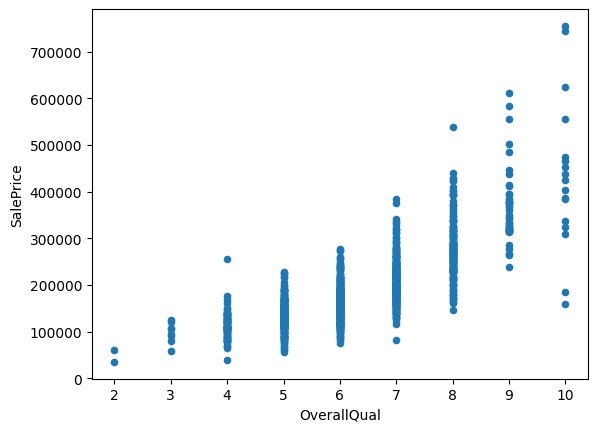

In [53]:
#학습을 위한 변수 선정.
data = pd.concat([train['SalePrice'],train['OverallQual']],axis = 1)
data.plot.scatter(x = 'OverallQual', y = 'SalePrice')

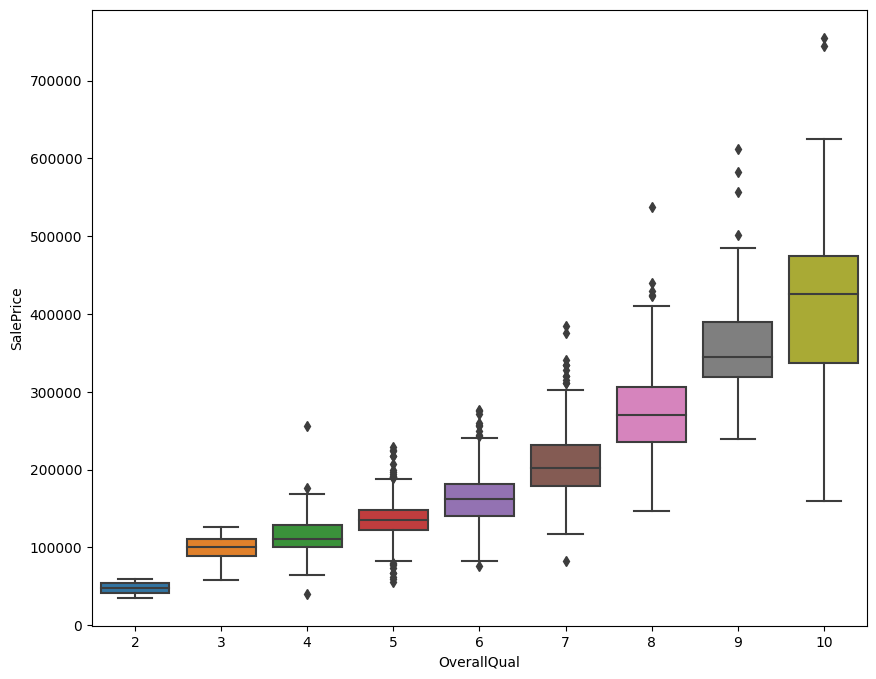

In [54]:
data = pd.concat([train['SalePrice'],train['OverallQual']],axis = 1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = data)

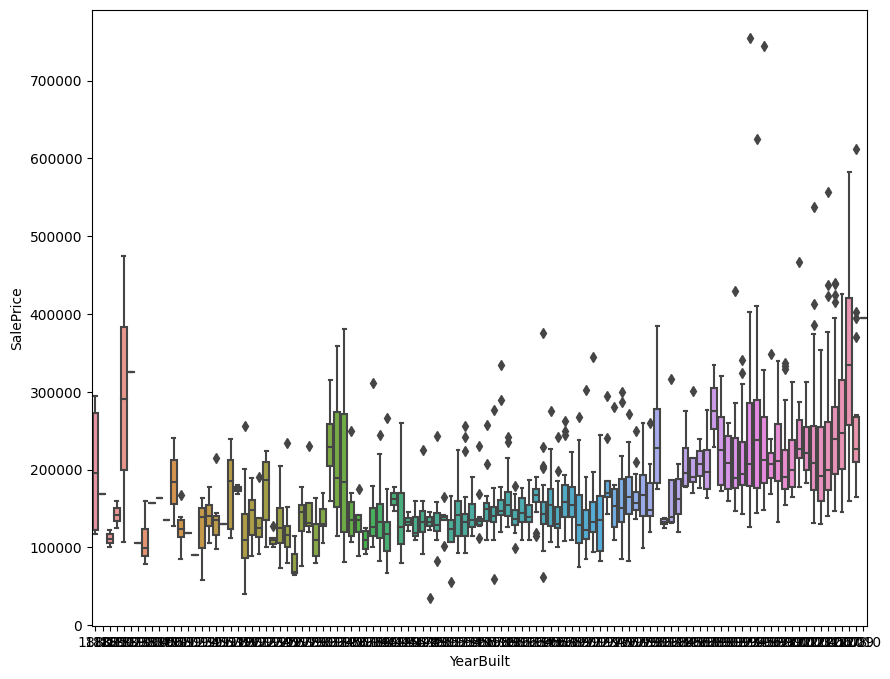

In [59]:
data = pd.concat([train['SalePrice'],train['YearBuilt']],axis = 1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = data)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

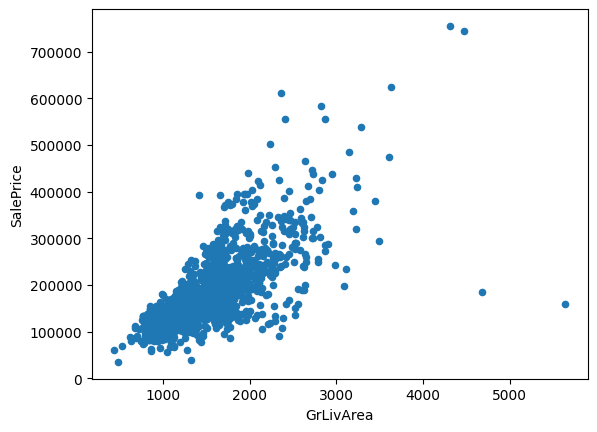

In [60]:
data = pd.concat([train['SalePrice'],train['GrLivArea']],axis = 1)
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice')

<Axes: >

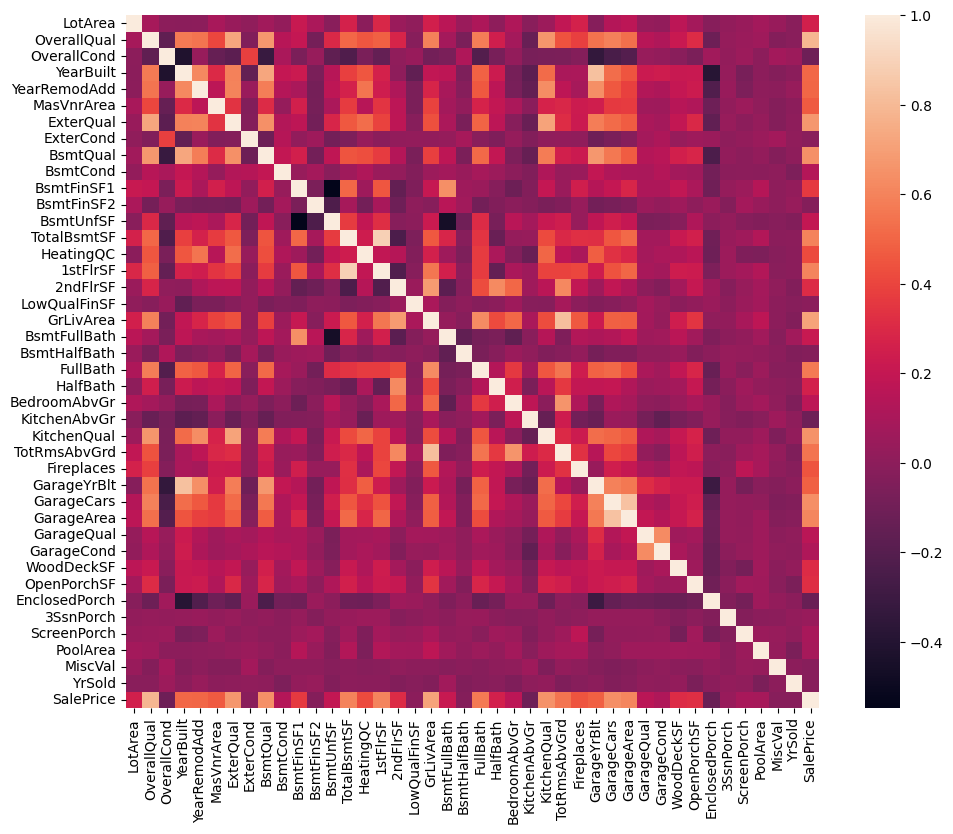

In [56]:
corr = train.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corr, square = True)

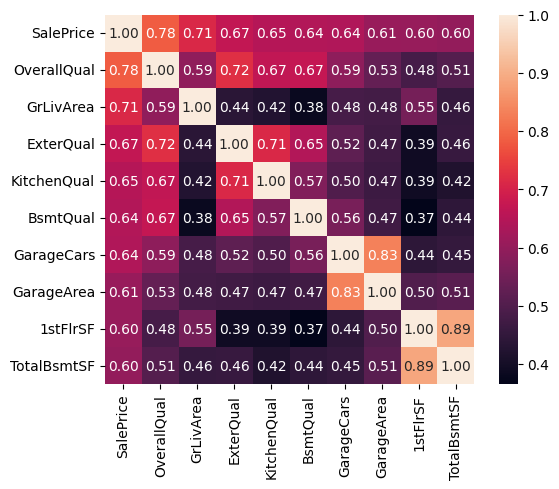

In [57]:
#변수가 너무 많아서 확인하기 곤란합니다. 따라서, 변수의 개수를 9개로 제한했습니다.
corr_ten = corr.nlargest(10,'SalePrice')['SalePrice']
corr_ten_idx = corr_ten.index
corr_mat = np.corrcoef(train[corr_ten_idx].values.T)
heatmap = sns.heatmap(corr_mat, cbar=True, annot=True, square=True, fmt='.2f'
                      ,yticklabels = corr_ten_idx.values,xticklabels = corr_ten_idx.values )
plt.show()

In [61]:
corr_df = pd.DataFrame([corr_ten_idx,corr_ten]).T
corr_df

,0,1
0,SalePrice,1.0
1,OverallQual,0.783641
2,GrLivArea,0.711438
3,ExterQual,0.66958
4,KitchenQual,0.650042
5,BsmtQual,0.643288
6,GarageCars,0.640611
7,GarageArea,0.608128
8,1stFlrSF,0.604934
9,TotalBsmtSF,0.600015


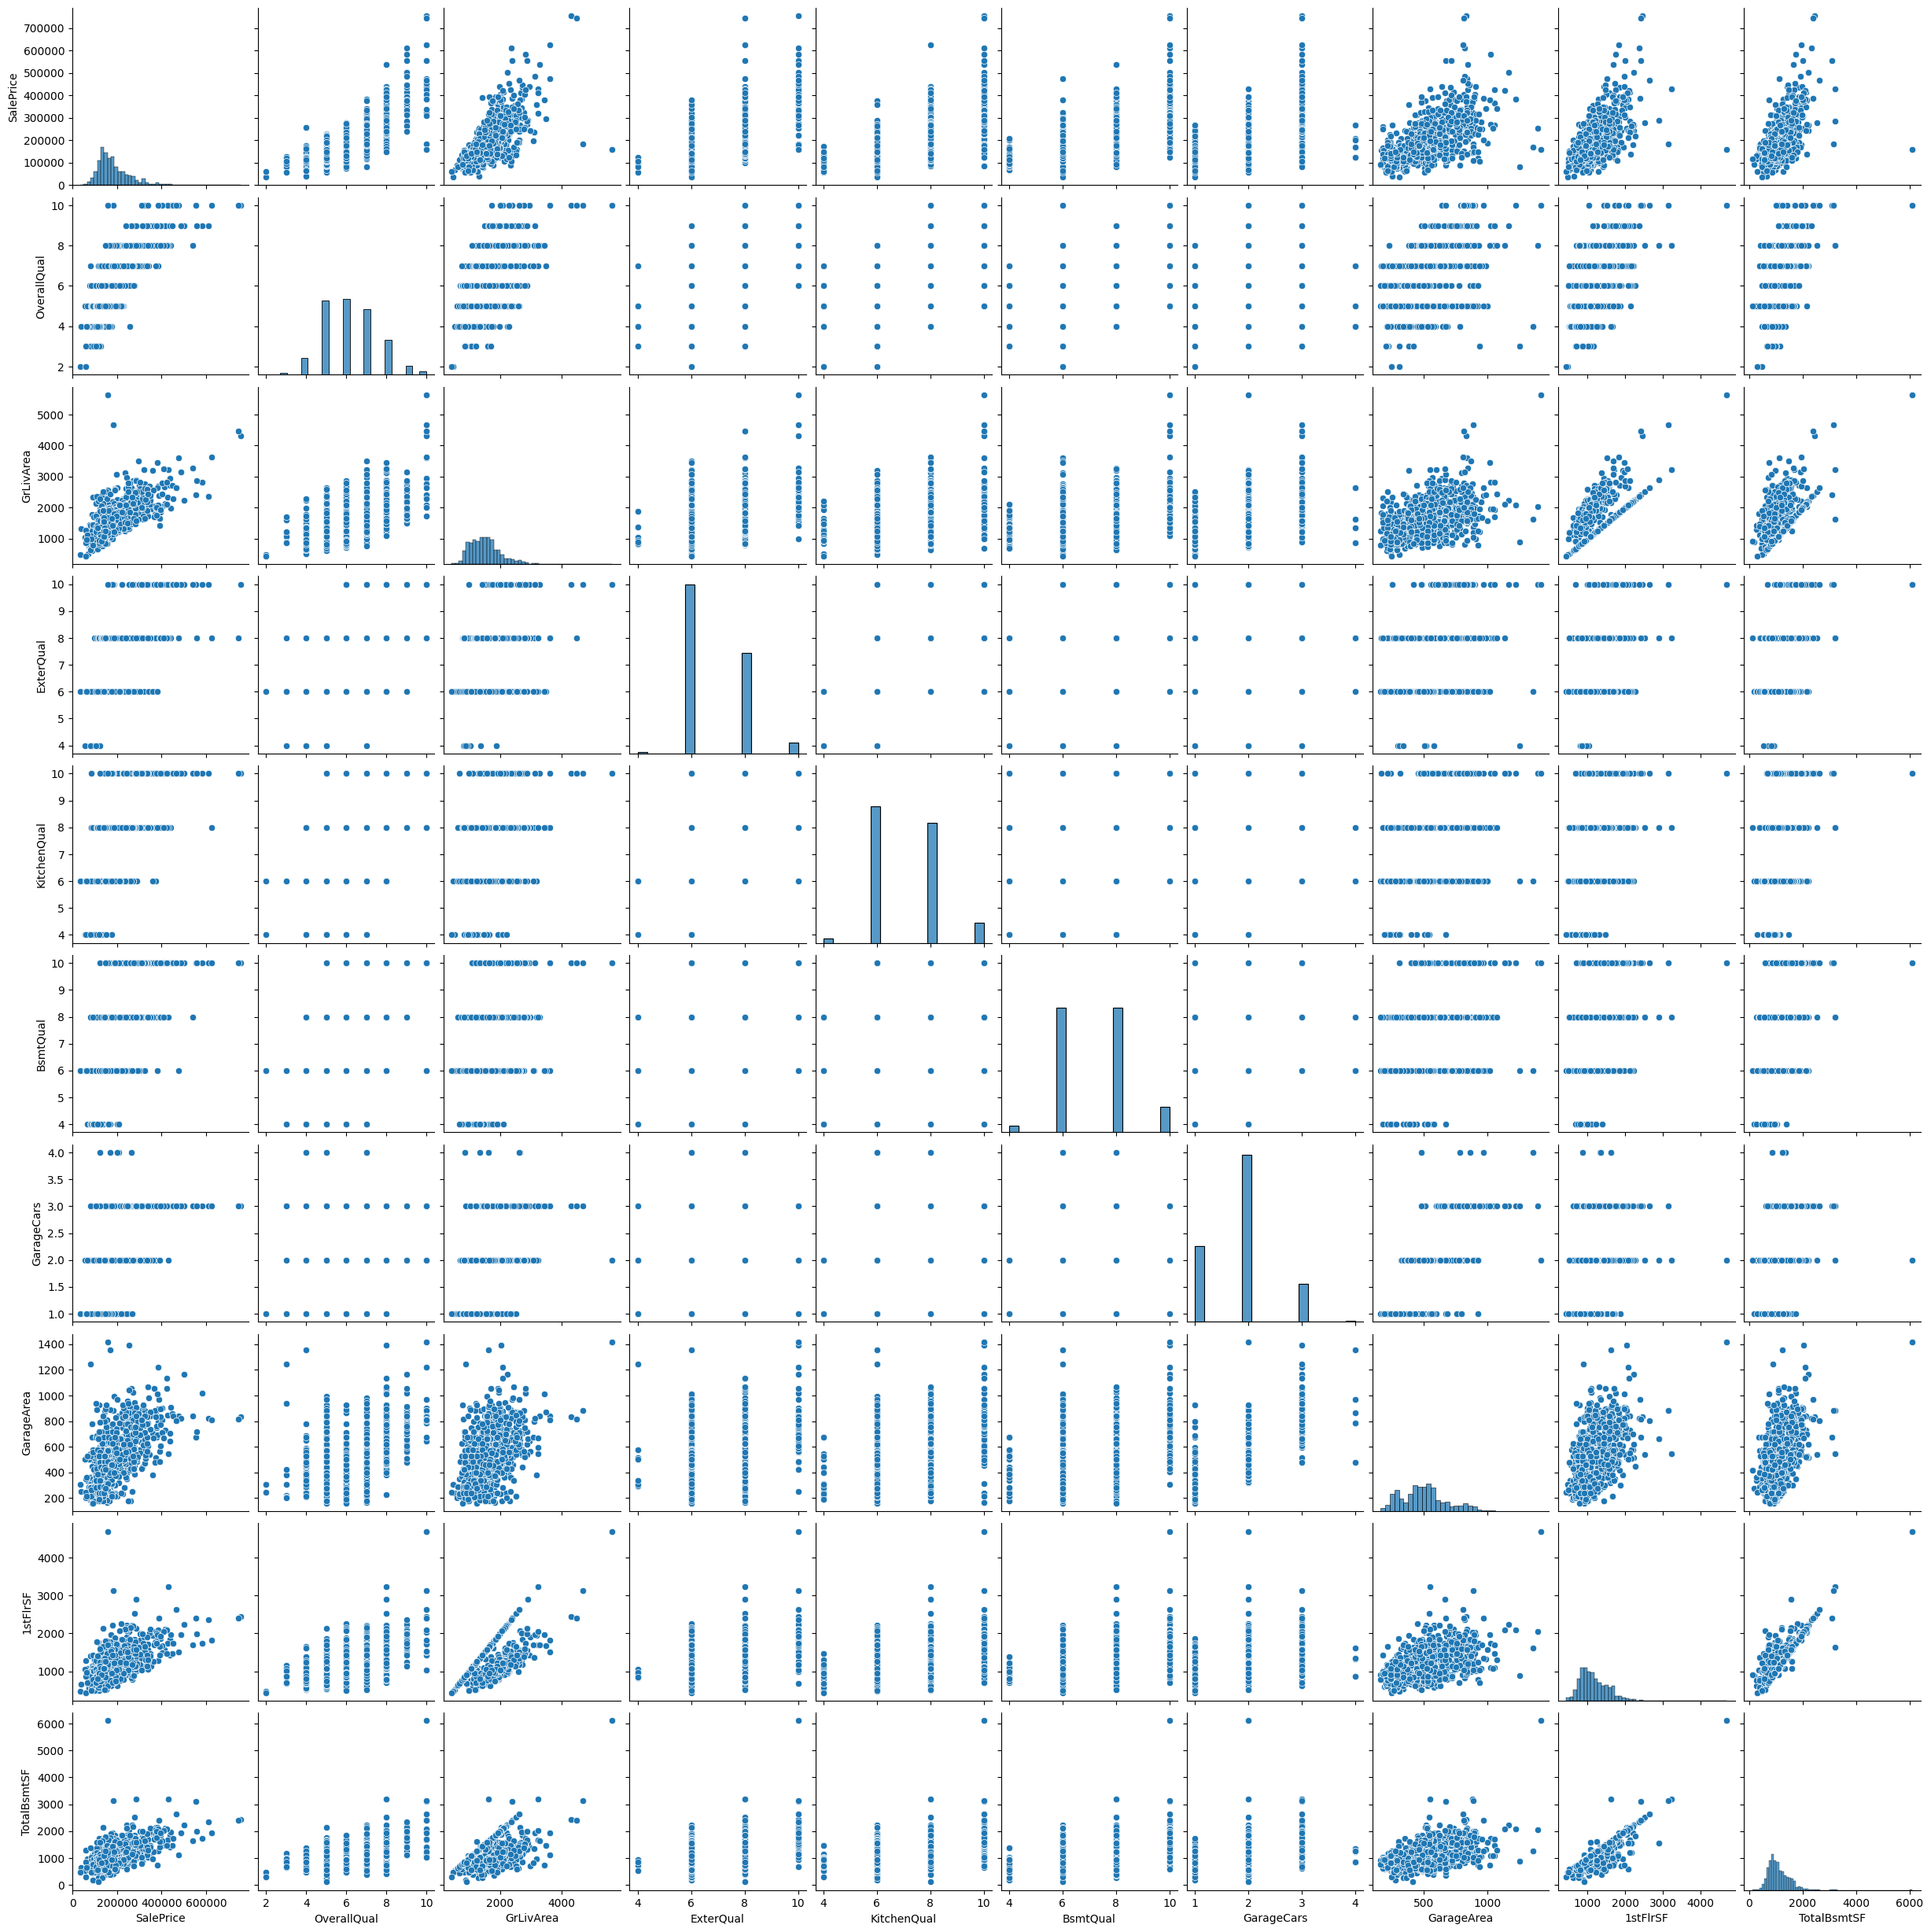

In [63]:
#상위 9개의 데이터의 pairplot이다.
sns.pairplot(train[corr_ten_idx])

In [90]:
#회귀 모델 훈련
#X는 독립변수이고, y는 종속변수이다. 
#Feature selection을 할때 앞서 변수 선택은 한번 진행하였으므로 
#Backward feature elimination 방식을 택하였다.

#모든 feature가 포함되었다가 중요도가 낮은 순으로 하나씩 제거하였다.
X1 = train[corr_ten_idx[1:10]]
X2 = train[corr_ten_idx[1:9]]
X3 = train[corr_ten_idx[1:8]]
X4 = train[corr_ten_idx[1:7]]
X5 = train[corr_ten_idx[1:6]]
X6 = train[corr_ten_idx[1:5]]

#정답 데이터이다(SalePrice).
y = train[corr_ten_idx[0]]

In [110]:
#선형 회귀
#회귀 모델을 import하고 훈련 데이터와 테스트 데이터를 구분하였다. 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size=0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size=0.2)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y,test_size=0.2)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y,test_size=0.2)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y,test_size=0.2)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6,y,test_size=0.2)

model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()

model1.fit(X1_train,y1_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)
model4.fit(X4_train,y4_train)
model5.fit(X5_train,y5_train)
model6.fit(X6_train,y6_train)

LinearRegression()

In [111]:
#모델 평가
print("X1의 경우 모델 평가 결과 : ",model1.score(X1_test,y1_test).round(3))
print("X2의 경우 모델 평가 결과 : ",model2.score(X2_test,y2_test).round(3))
print("X3의 경우 모델 평가 결과 : ",model3.score(X3_test,y3_test).round(3))
print("X4의 경우 모델 평가 결과 : ",model4.score(X4_test,y4_test).round(3))
print("X5의 경우 모델 평가 결과 : ",model5.score(X5_test,y5_test).round(3))
print("X6의 경우 모델 평가 결과 : ",model6.score(X6_test,y6_test).round(3))

X1의 경우 모델 평가 결과 :  0.829
X2의 경우 모델 평가 결과 :  0.729
X3의 경우 모델 평가 결과 :  0.782
X4의 경우 모델 평가 결과 :  0.631
X5의 경우 모델 평가 결과 :  0.761
X6의 경우 모델 평가 결과 :  0.755


In [107]:
X3.columns

Index(['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'BsmtQual',
       'GarageCars', 'GarageArea'],
      dtype='object')